In [1]:
import sys, os
sys.path.append(os.path.abspath('..'))

import jax.numpy as np
from rebel import rebel

/home/timk/.local/lib/python3.10/site-packages/jaxlib/plugin_support.py:71: RuntimeWarning: JAX plugin jax_cuda12_plugin version 0.5.3 is installed, but it is not compatible with the installed jaxlib version 0.6.2, so it will not be used.
  warnings.warn(


General use

(3, 500)
calculating derivative with splines
Set up rhs-library
norms 90.03622 45096.934
norms 90.03622 45096.934
working with L2 error
searching for optimal lambda
->working with Bayesian Information Criterion
100%|██████████| 200/200 [01:05<00:00,  3.05trial/s, best loss: -337.5263735038645] 
->Best value observed at:
lambda0= 0.026358675231475014 , 
lambda1= 0.016931082471054668 , 
lambda2= 0.009345422731335455 , 
alpha =  0.999999675486424
(3, 500) (10, 3) (10, 500)
->number of parameters: p= 19
->saving parameters and estimated attractor
-19.799*x_0 + 19.803*x_1
-0.086*x_0**2 + 0.086*x_0*x_1 - 1.953*x_0*x_2 + 54.331*x_0 - 0.022*x_1**2 - 1.7*x_1 + 0.021*x_2**2 - 0.754*x_2 + 6.146
0.136*x_0**2 + 1.822*x_0*x_1 - 0.03*x_0 + 0.049*x_1**2 - 0.015*x_1 - 0.01*x_2**2 - 5.185*x_2 + 0.947
rms_ls: 2.20670450011692
rms_int: 0.004465296
rms_wasserstein: -0.036831234
Optimization optimum: {'alpha': 0.999999675486424, 'l0': 0.026358675231475014, 'l1': 0.016931082471054668, 'l2': 0.009345422731335

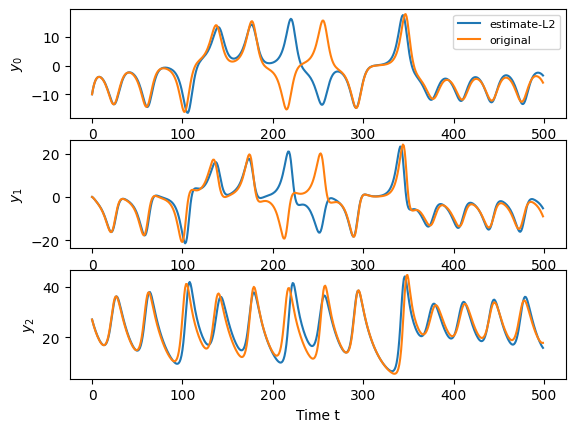

In [2]:
# Load the data (ensure lorenz.npy is in the working directory)
data = np.load("../data/lorenz_data.npy")
print(data.shape) # data should have the shape (N_x,N_t)

# Instantiate the rebel class with the data.
# Adjust stepsize and evals if needed for faster testing.
model = rebel(data=data, stepsize=0.01, evals=200, error="L2", order=2)

# Preprocess the data (calculate derivative and set up the library)
model.preprocess()

# (Optional) Calculate norms prior to optimization if you wish to inspect them separately.
model.calc_norms()

# Run the optimization procedure to estimate model parameters.
optimum, losses, errors = model.optimize()

# Print the optimization results.
print("Optimization optimum:", optimum)
print("Losses during optimization:", losses)
print("Errors:", errors)

# Plot the comparison of estimated vs. original trajectories.
model.plot_comparison()

Use of different metrics:

Wasserstein

(3, 500)
calculating derivative with splines
Set up rhs-library
norms 90.03622 45096.934
norms 90.03622 45096.934
working with W error
searching for optimal lambda
->working with Bayesian Information Criterion
100%|██████████| 200/200 [01:09<00:00,  2.88trial/s, best loss: -349.3480309230692]
->Best value observed at:
lambda0= 0.21901947625650844 , 
lambda1= 0.018325434941427077 , 
lambda2= 0.006810299384561549 , 
alpha =  1.4397450439188651e-06
(3, 500) (10, 3) (10, 500)
->number of parameters: p= 19
->saving parameters and estimated attractor
-19.799*x_0 + 19.803*x_1
-0.086*x_0**2 + 0.086*x_0*x_1 - 1.953*x_0*x_2 + 54.331*x_0 - 0.022*x_1**2 - 1.7*x_1 + 0.021*x_2**2 - 0.754*x_2 + 6.146
0.136*x_0**2 + 1.822*x_0*x_1 - 0.03*x_0 + 0.049*x_1**2 - 0.015*x_1 - 0.01*x_2**2 - 5.185*x_2 + 0.947
rms_ls: 2.20670450011692
rms_int: 0.0043609594
rms_wasserstein: -0.03683144
Optimization optimum: {'alpha': 1.4397450439188651e-06, 'l0': 0.21901947625650844, 'l1': 0.018325434941427077, 'l2': 0.006810299

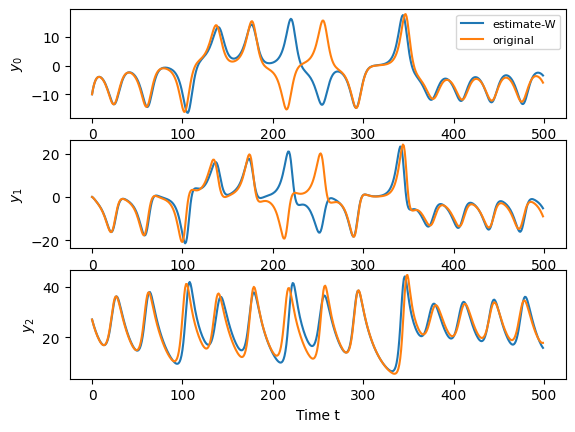

In [3]:
# Load the data (ensure lorenz.npy is in the working directory)
data = np.load("../data/lorenz_data.npy")
print(data.shape) # data should have the shape (N_x,N_t)

# Instantiate the rebel class with the data.
# Adjust stepsize and evals if needed for faster testing.
model = rebel(data=data, stepsize=0.01, evals=200, error="W", order=2)

# Preprocess the data (calculate derivative and set up the library)
model.preprocess()

# (Optional) Calculate norms prior to optimization if you wish to inspect them separately.
model.calc_norms()

# Run the optimization procedure to estimate model parameters.
optimum, losses, errors = model.optimize()

# Print the optimization results.
print("Optimization optimum:", optimum)
print("Losses during optimization:", losses)
print("Errors:", errors)

# Plot the comparison of estimated vs. original trajectories.
model.plot_comparison()

Mixed norm

(3, 500)
calculating derivative with splines
Set up rhs-library
norms 90.03622 45096.934
norms 90.03622 45096.934
working with mixed error
searching for optimal lambda
->working with Bayesian Information Criterion
100%|██████████| 200/200 [01:12<00:00,  2.77trial/s, best loss: -343.7708243114359]
->Best value observed at:
lambda0= 0.47028534705686775 , 
lambda1= 0.015446689595081765 , 
lambda2= 0.005859489471434386 , 
alpha =  0.468830603884009
(3, 500) (10, 3) (10, 500)
->number of parameters: p= 19
->saving parameters and estimated attractor
-19.799*x_0 + 19.803*x_1
-0.086*x_0**2 + 0.086*x_0*x_1 - 1.953*x_0*x_2 + 54.331*x_0 - 0.022*x_1**2 - 1.7*x_1 + 0.021*x_2**2 - 0.754*x_2 + 6.146
0.136*x_0**2 + 1.822*x_0*x_1 - 0.03*x_0 + 0.049*x_1**2 - 0.015*x_1 - 0.01*x_2**2 - 5.185*x_2 + 0.947
rms_ls: 2.20670450011692
rms_int: 0.0044098757
rms_wasserstein: -0.03683134
Optimization optimum: {'alpha': 0.468830603884009, 'l0': 0.47028534705686775, 'l1': 0.015446689595081765, 'l2': 0.005859489471434

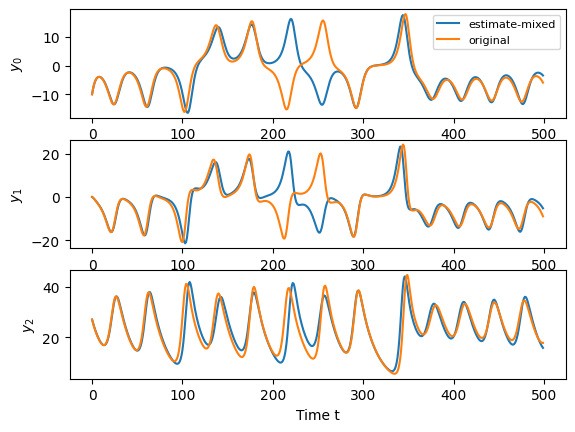

In [2]:
# Load the data (ensure lorenz.npy is in the working directory)
data = np.load("../data/lorenz_data.npy")
print(data.shape) # data should have the shape (N_x,N_t)

# Instantiate the rebel class with the data.
# Adjust stepsize and evals if needed for faster testing.
model = rebel(data=data, stepsize=0.01, evals=200, error="mixed", order=2)

# Preprocess the data (calculate derivative and set up the library)
model.preprocess()

# (Optional) Calculate norms prior to optimization if you wish to inspect them separately.
model.calc_norms()

# Run the optimization procedure to estimate model parameters.
optimum, losses, errors = model.optimize()

# Print the optimization results.
print("Optimization optimum:", optimum)
print("Losses during optimization:", losses)
print("Errors:", errors)

# Plot the comparison of estimated vs. original trajectories.
model.plot_comparison()